In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("movies_complete.csv", parse_dates= ["release_date"])

In [3]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [5]:
from IPython.display import HTML
pd.options.display.max_colwidth = 100

## The best and the worst movies...

__Movies Top 5 - Highest Revenue__

In [6]:
best_movies =df[['title','revenue_musd','poster_path','popularity','genres']].sort_values(by='revenue_musd',ascending=False).head(5)

In [7]:
HTML(best_movies.to_html(escape=False))

,title,revenue_musd,poster_path,popularity,genres
14448,Avatar,2787.97,,185.07,Action|Adventure|Fantasy|Science Fiction
26265,Star Wars: The Force Awakens,2068.22,,31.63,Action|Adventure|Science Fiction|Fantasy
1620,Titanic,1845.03,,26.89,Drama|Romance|Thriller
17669,The Avengers,1519.56,,89.89,Science Fiction|Action|Adventure
24812,Jurassic World,1513.53,,32.79,Action|Adventure|Science Fiction|Thriller


__Movies Top 5 - Highest Budget__

In [8]:
best_budget_movies =df[['title','budget_musd','poster_path','popularity','genres']].sort_values(by='budget_musd',ascending=False).head(5)

In [9]:
HTML(best_budget_movies.to_html(escape=False))

,title,budget_musd,poster_path,popularity,genres
16986,Pirates of the Caribbean: On Stranger Tides,380.00,,27.89,Adventure|Action|Fantasy
11743,Pirates of the Caribbean: At World's End,300.00,,31.36,Adventure|Fantasy|Action
26268,Avengers: Age of Ultron,280.00,,37.38,Action|Adventure|Science Fiction
10985,Superman Returns,270.00,,13.28,Adventure|Fantasy|Action|Science Fiction
18517,John Carter,260.00,,14.67,Action|Adventure|Science Fiction


__Movies Top 5 - Highest Profit__

In [10]:
df['profit'] = df.revenue_musd.sub(df.budget_musd)

In [11]:
best_profit_movies =df[['title','profit','poster_path','popularity','genres']].sort_values(by='profit',ascending=False).head(5)

In [12]:
HTML(best_profit_movies.to_html(escape=False))

,title,profit,poster_path,popularity,genres
14448,Avatar,2550.97,,185.07,Action|Adventure|Fantasy|Science Fiction
26265,Star Wars: The Force Awakens,1823.22,,31.63,Action|Adventure|Science Fiction|Fantasy
1620,Titanic,1645.03,,26.89,Drama|Romance|Thriller
24812,Jurassic World,1363.53,,32.79,Action|Adventure|Science Fiction|Thriller
28501,Furious 7,1316.25,,27.28,Action


__Movies Top 5 - Lowest Profit__

In [13]:
worst_profit_movies =df[['title','profit','poster_path','popularity','genres']].sort_values(by='profit',ascending=True).head(5)

In [14]:
HTML(worst_profit_movies.to_html(escape=False))

,title,profit,poster_path,popularity,genres
20959,The Lone Ranger,-165.71,,12.73,Action|Adventure|Western
7164,The Alamo,-119.18,,12.24,Western|History|War
16659,Mars Needs Moms,-111.01,,7.25,Adventure|Animation|Family
43611,Valerian and the City of a Thousand Planets,-107.45,,15.26,Adventure|Science Fiction|Action
2684,The 13th Warrior,-98.30,,10.31,Adventure|Fantasy|Action


__Movies Top 5 - Most Popular__

In [15]:
best_popular_movies =df[['title','poster_path','popularity','genres']].sort_values(by='popularity',ascending=False).head(5)

In [16]:
HTML(best_popular_movies.to_html(escape=False))

,title,poster_path,popularity,genres
30330,Minions,,547.49,Family|Animation|Adventure|Comedy
32927,Wonder Woman,,294.34,Action|Adventure|Fantasy
41556,Beauty and the Beast,,287.25,Family|Fantasy|Romance
42940,Baby Driver,,228.03,Action|Crime
24187,Big Hero 6,,213.85,Adventure|Family|Animation|Action|Comedy


__Movies Top 5 - Highest Rating__

In [17]:
best_rating_movies =df[['title','poster_path','popularity','vote_average','vote_count']].sort_values(['vote_count','vote_average'],ascending=False).head(5)

In [18]:
HTML(best_rating_movies.to_html(escape=False))

,title,poster_path,popularity,vote_average,vote_count
15368,Inception,,29.11,8.10,14075.00
12396,The Dark Knight,,123.17,8.30,12269.00
14448,Avatar,,185.07,7.20,12114.00
17669,The Avengers,,89.89,7.40,12000.00
26272,Deadpool,,187.86,7.40,11444.00


## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (high Rating)__

In [19]:
df_genres=df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')

In [20]:
df_actor=df.cast.str.contains('Bruce Willis')

In [21]:
bruce=df.loc[df_genres & df_actor,['title','poster_path','genres','vote_average']].sort_values(by='vote_average',ascending = False)

In [22]:
HTML(bruce.to_html(escape=False))

,title,poster_path,genres,vote_average
1448,The Fifth Element,,Adventure|Fantasy|Action|Thriller|Science Fiction,7.30
19218,Looper,,Action|Thriller|Science Fiction,6.60
1786,Armageddon,,Action|Thriller|Science Fiction|Adventure,6.50
14135,Surrogates,,Action|Science Fiction|Thriller,5.90
20333,G.I. Joe: Retaliation,,Adventure|Action|Science Fiction|Thriller,5.40
27619,Vice,,Thriller|Science Fiction|Action|Adventure,4.10


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)__

In [23]:
df_mov=df.cast.str.contains('Uma Thurman')

In [24]:
df_dir = df.director.str.contains('Quentin Tarantino')

In [25]:
uma =df.loc[df_mov & df_dir,['title','poster_path','genres','runtime']].sort_values(by='runtime',ascending=False).set_index('title')

In [26]:
HTML(uma.to_html(escape=False))

,poster_path,genres,runtime
title,,,
Pulp Fiction,,Thriller|Crime,154.00
Kill Bill: Vol. 2,,Action|Crime|Thriller,136.00
Kill Bill: Vol. 1,,Action|Crime,111.00


Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)


Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)


In [27]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morr...,13,106,John Lasseter,343.55
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan G...,26,16,Joe Johnston,197.80


In [28]:
pix= df.production_companies.str.contains('Pixar').fillna(False)

In [29]:
time= df.release_date.between('2010-01-01','2015-12-30')

In [30]:
date= df.loc[pix & time,['title','revenue_musd','release_date','poster_path']].sort_values(by='revenue_musd',ascending=False).set_index('title')

In [31]:
HTML(date.to_html(escape=False))

,revenue_musd,release_date,poster_path
title,,,
Toy Story 3,1066.97,2010-06-16,
Inside Out,857.61,2015-06-09,
Monsters University,743.56,2013-06-20,
Cars 2,559.85,2011-06-11,
Brave,538.98,2012-06-21,
The Good Dinosaur,331.93,2015-11-14,
Day & Night,NaN,2010-06-17,
The Blue Umbrella,NaN,2013-02-12,
Toy Story of Terror!,NaN,2013-10-15,


Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)


In [32]:
genres= df.genres.str.contains('Action') & df.genres.str.contains('Thriller')

In [33]:
lan =df.original_language.str.contains('en')

In [34]:
rate =df.vote_average >= 7.5

In [35]:
count= df.vote_count >= 10

In [36]:
action=df.loc[lan & genres & rate & count,['poster_path','title','release_date','vote_count','genres','vote_average']].sort_values(by='vote_average',ascending=False).set_index('title')

In [37]:
HTML(action.to_html(escape=False))

,poster_path,release_date,vote_count,genres,vote_average
title,,,,,
I Am So Proud of You,,2008-01-01,12.00,Animation|Action|Thriller|Science Fiction,8.30
The Dark Knight,,2008-07-16,12269.00,Drama|Action|Crime|Thriller,8.30
Inception,,2010-07-14,14075.00,Action|Thriller|Science Fiction|Mystery|Adventure,8.10
Scarface,,1983-12-08,3017.00,Action|Crime|Drama|Thriller,8.00
Inglourious Basterds,,2009-08-18,6598.00,Drama|Action|Thriller|War,7.90
Alien,,1979-05-25,4564.00,Horror|Action|Thriller|Science Fiction,7.90
Bound by Honor,,1993-02-05,116.00,Action|Crime|Drama|Thriller,7.70
V for Vendetta,,2006-03-15,4562.00,Action|Thriller|Fantasy,7.70
Carlito's Way,,1993-11-10,805.00,Action|Crime|Drama|Thriller,7.70


Most Successful Directors

In [38]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

<Axes: >

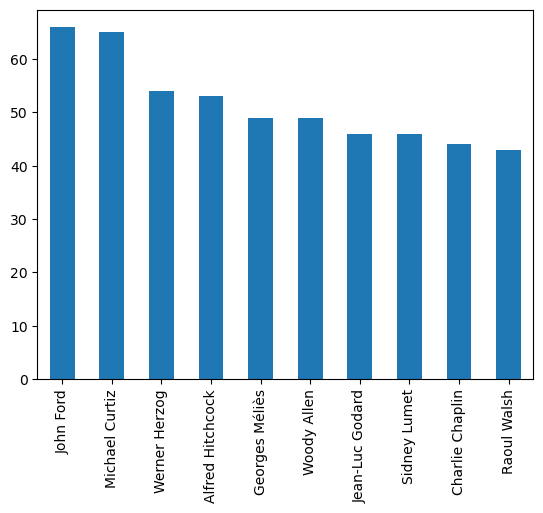

In [39]:
df.director.value_counts().head(10).plot(kind='bar')

In [40]:
df.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

In [41]:
director = df.groupby("director").agg({"title" :"count","revenue_musd":"sum","vote_average":"mean","vote_count": "sum"})

In [42]:
director

,title,revenue_musd,vote_average,vote_count
director,,,,
Dale Trevillion\t,2,0.00,4.00,4.00
Davide Manuli,1,0.00,6.90,10.00
E.W. Swackhamer,1,0.00,5.90,5.00
Vitaliy Vorobyov,1,0.00,5.50,3.00
Yeon Sang-Ho,4,2.13,6.60,1039.00
...,...,...,...,...
Ярополк Лапшин,1,0.00,10.00,1.00
پیمان معادی,1,0.00,6.00,2.00
塩谷 直義,1,0.00,7.20,40.00


In [43]:
director[(director.vote_count >= 10000) & (director.title >= 10)].nlargest(20, "vote_average").sort_values('revenue_musd',ascending=False)

,title,revenue_musd,vote_average,vote_count
director,,,,
Steven Spielberg,33,9256.62,6.89,62266.00
Peter Jackson,13,6528.24,7.14,47571.00
James Cameron,11,5900.61,6.93,33736.00
Christopher Nolan,11,4747.41,7.62,67344.00
Robert Zemeckis,19,4138.23,6.79,37666.00
Tim Burton,21,4032.92,6.73,36922.00
John Lasseter,10,2256.02,6.72,18337.00
David Fincher,10,2139.35,7.35,37588.00
Martin Scorsese,39,1990.98,7.22,35541.00


In [44]:
df.genres = df.genres.astype(str)

In [45]:
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson    982.29
James Wan             861.31
Wes Craven            834.93
Francis Lawrence      816.23
Ridley Scott          689.00
Marc Forster          531.87
Steven Spielberg      500.10
William Friedkin      466.40
Darren Lynn Bousman   456.34
M. Night Shyamalan    375.37
Henry Joost           349.07
David R. Ellis        348.74
Adrian Lyne           346.11
James DeMonaco        316.70
Stephen Sommers       311.46
Gore Verbinski        275.91
Guillermo del Toro    261.63
John R. Leonetti      255.27
Fede Alvarez          254.64
Jordan Peele          252.43
Name: revenue_musd, dtype: float64

Most Successful Actors

In [46]:
act = df.cast.str.split("|", expand = True)
act

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
0,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44687,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44688,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44689,Iwan Mosschuchin,Nathalie Lissenko,Pavel Pavlov,Aleksandr Chabrov,Vera Orlova,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [47]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [48]:
act.columns = ["Actor"]

In [49]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [50]:
act

,Actor,title,revenue_musd,vote_average,popularity
0,Tom Hanks,Toy Story,373.55,7.70,21.95
0,Tim Allen,Toy Story,373.55,7.70,21.95
0,Don Rickles,Toy Story,373.55,7.70,21.95
0,Jim Varney,Toy Story,373.55,7.70,21.95
0,Wallace Shawn,Toy Story,373.55,7.70,21.95
...,...,...,...,...,...
44689,Iwan Mosschuchin,Satan Triumphant,NaN,NaN,0.00
44689,Nathalie Lissenko,Satan Triumphant,NaN,NaN,0.00
44689,Pavel Pavlov,Satan Triumphant,NaN,NaN,0.00
44689,Aleksandr Chabrov,Satan Triumphant,NaN,NaN,0.00


In [51]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [52]:
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Bess Flowers,368.91,14.76,6.18,2.03,240
Christopher Lee,9417.05,324.73,5.91,4.75,148
John Wayne,236.09,11.24,5.71,3.09,125
Samuel L. Jackson,17109.62,213.87,6.27,11.70,122
Michael Caine,8053.40,191.75,6.27,8.27,110
Gérard Depardieu,1247.61,95.97,6.05,3.70,109
John Carradine,255.84,19.68,5.55,2.43,109
Donald Sutherland,5390.77,138.22,6.23,7.00,108
Jackie Chan,4699.19,146.85,6.28,5.86,108


In [53]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Gloria Stuart,1845.03,1845.03,6.37,3.48,18
Keith Richards,2967.71,989.24,6.46,5.03,23
Zoë Wanamaker,976.48,976.48,6.33,6.82,10
James Cameron,1862.08,931.04,7.06,4.69,12
Matthew Lewis,7915.31,879.48,7.37,23.10,11
Luke de Woolfson,1720.67,860.34,5.72,8.77,11
Yuri Lowenthal,1708.16,854.08,6.19,19.88,17
Dominic Monaghan,3289.61,822.40,6.05,10.62,11
Philip Ng,821.71,821.71,5.92,6.35,10


In [54]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Katy Mixon,1519.57,151.96,5.84,51.97,12
Terry Notary,6947.21,694.72,6.47,51.58,11
Goran D. Kleut,2568.94,366.99,6.00,42.32,10
Mark Smith,2195.52,243.95,6.55,40.08,11
Jon Hamm,3449.35,191.63,6.33,39.42,25
Gal Gadot,5449.53,495.41,6.33,37.39,11
Ava Acres,6272.36,482.49,5.99,36.26,21
Emma Watson,9639.20,535.51,6.77,35.97,19
Joseph Oliveira,3543.44,354.34,7.64,34.45,10


In [55]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,profit
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morr...,13,106,John Lasseter,343.55
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan G...,26,16,Joe Johnston,197.80
